<a href="https://colab.research.google.com/github/c-quilo/st_playground/blob/main/EE_dataExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 

In [ ]:
import geemap

In [ ]:
import PIL
#PIL.Image.MAX_IMAGE_PIXELS = 933120000
import ee
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=_v5OTUVueJEWAMdIsaqO8ki86uILY60ZG7R-EfQxn00&tc=jfCkWRwP5HZ1U6_0eZ_IbiLyL7_IzVOtsnUY8Af10uo&cc=H86vXr4I3dCN2y1OlJnOTZ61_rPh91HlvnwnHOeKmWg

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AWtgzh6TclUJXT26sBH4J84BK1G30J1pZYNDpbyxvAzU0uP6U-qUiQaTQ30

Successfully saved authorization token.


In [ ]:
start_date = '2021-01-01T00:00'
end_date = '2020-01-02T01:00'
west=-84.24
south=-53.71
east=-62.00
north=-17.00


In [ ]:
import time
import datetime
#img = lst_img

number = 0
for i in range(24*365):
    print(i)
    lst = ee.ImageCollection(ee.ImageCollection("JAXA/GPM_L3/GSMaP/v6/operational"))
    #lst = ee.ImageCollection("Oxford/MAP/LST_Day_5km_Monthly")
    i_date = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M')
    f_date = i_date + datetime.timedelta(hours=1)
    start_date = datetime.datetime.strftime(f_date, '%Y-%m-%dT%H:%M')

    #lst = lst.select(['hourlyPrecipRate']).filterDate(ee.Date('2020'), ee.Date('2021'))
    lst = lst.select(['hourlyPrecipRate']).filterDate(i_date, f_date)

    #lst = lst.select(['Mean'])#.filterDate(i_date,f_date)
    collectionList = lst.toList(lst.size())
    collectionSize = collectionList.size().getInfo()

    image = ee.Image(collectionList.get(0))
    img = image

    aoi=ee.Geometry.BBox(west, south, east, north)
    task = ee.batch.Export.image.toDrive(img,                                              
    #description="slope10_30"+str(i),
    description="precip_mean_" + str(i),
    #description="cloud_"+str(i),
    #description="QC_Day_"+str(i),
    folder = 'cesar',
    #folder = 'cloud',
    fileFormat='GeoTIFF',
    region=aoi)

    #print(img)

    task.start()
    time.sleep(2)
    # task = ee.batch.Export.image.toDrive(image=img,

    #                                  description='precip_mean_e',
    #                                  region=aoi,
    #                                  fileFormat='GeoTIFF')
    print(task.status())


0
{'state': 'READY', 'description': 'precip_mean_0', 'creation_timestamp_ms': 1674041613512, 'update_timestamp_ms': 1674041613512, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': '6CDHKKWESBTG4PTQOPV74GDY', 'name': 'projects/earthengine-legacy/operations/6CDHKKWESBTG4PTQOPV74GDY'}
1
{'state': 'READY', 'description': 'precip_mean_1', 'creation_timestamp_ms': 1674041617320, 'update_timestamp_ms': 1674041617320, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'NCPGAAVNYNMUEJGEIRNWTTDL', 'name': 'projects/earthengine-legacy/operations/NCPGAAVNYNMUEJGEIRNWTTDL'}
2
{'state': 'READY', 'description': 'precip_mean_2', 'creation_timestamp_ms': 1674041620516, 'update_timestamp_ms': 1674041620516, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'KRJEWSKQPD7IGC2MKQX2P2MJ', 'name': 'projects/earthengine-legacy/operations/KRJEWSKQPD7IGC2MKQX2P2MJ'}
3
{'state': 'READY', 'description': 'precip_mean_3', 'creation_timestamp_ms': 1674041623782, 'update_timestamp_ms': 16

KeyboardInterrupt: ignored

In [ ]:
lst

In [ ]:
import ee
import geemap
import numpy as np
import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

for year in np.arange(2015, 2016):

  start_date = f'{year}-01-01T00:00'
  ini_date = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M')
  final_date = ini_date + relativedelta(years=1)
  j = final_date - ini_date
  west=-84
  south=-57#-53.71
  east=-32#-62.00
  north=14#-17.00
  collector = np.zeros((147, 89, j.days))
  for i in range(1):
    lst = ee.ImageCollection(ee.ImageCollection("NOAA/PERSIANN-CDR"))
    #lst = ee.ImageCollection("Oxford/MAP/LST_Day_5km_Monthly")
    i_date = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M')
    print(i_date)
    f_date = i_date + datetime.timedelta(days=1)
    start_date = datetime.datetime.strftime(f_date, '%Y-%m-%dT%H:%M')
    
    #lst = lst.select(['hourlyPrecipRate']).filterDate(ee.Date('2020'), ee.Date('2021'))
    lst = lst.select(['precipitation']).filterDate(i_date, f_date)
    collectionList = lst.toList(lst.size())
    collectionSize = collectionList.size().getInfo()
    img = ee.Image(collectionList.get(0))
    aoi=ee.Geometry.BBox(west, south, east, north)

    rgb_img = geemap.ee_to_numpy(img, region=aoi)
    print(rgb_img.shape)
    collector[:, :, i] = np.squeeze(rgb_img)
    #rgb_img = (255*((rgb_img[:, :, :] - 100)/3500)).astype('uint8')

    #plt.imshow(np.squeeze(rgb_img))
    #plt.colorbar()
    #plt.show()
  np.save(f'/content/drive/MyDrive/PERSIANN/PERSIANN_Chile_{year}.npy', collector)


2015-01-01 00:00:00
(284, 208, 1)


ValueError: ignored

In [ ]:
collector = np.zeros((284, 208, 0))
for year in np.arange(2000, 2019):
  temp = np.load(f'/content/drive/MyDrive/PERSIANN/PERSIANN_SouthAmerica_{year}.npy')
  collector = np.dstack((collector, temp))
  print(collector.shape)
train_PERSIANN = collector
np.save(f'/content/drive/MyDrive/PERSIANN/train_PERSIANN.npy', train_PERSIANN)

(284, 208, 366)
(284, 208, 731)
(284, 208, 1096)
(284, 208, 1461)
(284, 208, 1827)
(284, 208, 2192)
(284, 208, 2557)
(284, 208, 2922)
(284, 208, 3288)
(284, 208, 3653)
(284, 208, 4018)
(284, 208, 4383)
(284, 208, 4749)
(284, 208, 5114)
(284, 208, 5479)
(284, 208, 5844)
(284, 208, 6210)
(284, 208, 6575)
(284, 208, 6940)


In [ ]:
len(collector)

19

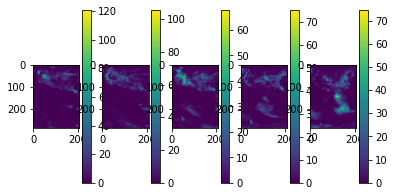

In [ ]:
hola = np.load('/content/drive/MyDrive/PERSIANN/PERSIANN_SouthAmerica_2020.npy')
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(hola[:, :, 100+i])
  plt.colorbar()

In [ ]:
import ee
import geemap
import numpy as np
import datetime
import matplotlib.pyplot as plt

start_date = '2021-01-01T00:00'
end_date = '2020-01-02T01:00'
west=-84.24
south=-57#-53.71
east=-62.00
north=-17.00
collector = np.zeros((400, 223, 12))

for i in range(12):
  print(i)
  lst = ee.ImageCollection(ee.ImageCollection("JAXA/GPM_L3/GSMaP/v6/operational"))
  #lst = ee.ImageCollection("Oxford/MAP/LST_Day_5km_Monthly")
  i_date = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M')
  f_date = i_date + datetime.timedelta(days=1)
  start_date = datetime.datetime.strftime(f_date, '%Y-%m-%dT%H:%M')

  #lst = lst.select(['hourlyPrecipRate']).filterDate(ee.Date('2020'), ee.Date('2021'))
  lst = lst.select(['hourlyPrecipRate']).filterDate(i_date, f_date).mean()
  #collectionList = lst.toList(lst.size())
  #collectionSize = collectionList.size().getInfo()
  #img = ee.Image(collectionList.get(0))
  img = lst

  aoi = ee.Geometry.Polygon(
    [[[west, south],
      [east, south],
      [east, north],
      [west, north]]], None, False)

  aoi=ee.Geometry.BBox(west, south, east, north)

  rgb_img = geemap.ee_to_numpy(img, region=aoi)
  collector[:, :, i] = np.squeeze(rgb_img)
  #print(rgb_img.shape)

  #rgb_img_test = (255*((rgb_img[:, :, :] - 100)/3500)).astype('uint8')

  plt.imshow(np.squeeze(rgb_img))

  plt.show()


0


ValueError: ignored

In [ ]:
lst

In [ ]:
print(img)


ee.Image({
  "functionInvocationValue": {
    "functionName": "Image.toFloat",
    "arguments": {
      "value": {
        "functionInvocationValue": {
          "functionName": "List.get",
          "arguments": {
            "index": {
              "constantValue": 0
            },
            "list": {
              "functionInvocationValue": {
                "functionName": "Collection.toList",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "ImageCollection.load",
                      "arguments": {
                        "id": {
                          "constantValue": "JAXA/GPM_L3/GSMaP/v6/reanalysis"
                        }
                      }
                    }
                  },
                  "count": {
                    "functionInvocationValue": {
                      "functionName": "Collection.size",
                      "arguments": {
         

In [ ]:
import time
import datetime
#img = lst_img
number =0
for i in range(1):
    lst = ee.ImageCollection("JAXA/GPM_L3/GSMaP/v6/reanalysis")
    #lst = ee.ImageCollection("MODIS/006/MOD11A2") 
    #lst = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
    #lst = ee.ImageCollection("MODIS/006/MOD44B")
    i_date = start_date[i]

    dt = datetime.datetime.strptime(i_date, '%Y-%m-%d')
    i_date = str(dt.year)+'-'+"{:02d}".format(dt.month)+'-'+"{:02d}".format(1)
    dt = datetime.datetime.strptime(i_date, '%Y-%m-%d')
    ft = dt+datetime.timedelta(days=1)
    #f_date = '2015-01-02'
    f_date = str(ft.year)+'-'+"{:02d}".format(ft.month)+'-'+"{:02d}".format(ft.day)
    #i_date = '2003-09-02'
    #f_date = '2003-09-09'
    lst = lst.select(['Mean']).filterDate(i_date, f_date)
    #lst = lst.select(['LST_Day_1km']).filterDate(i_date, f_date)
    #lst = lst.select(['ST_B10']).filterDate(i_date, f_date)
    #lst = lst.select(['Cloud']).filterDate(i_date, f_date)
    

    imglist=lst
    collectionList = imglist.toList(imglist.size())
    collectionSize = collectionList.size().getInfo()

    image = ee.Image(collectionList.get(0))
    img = image

    #print(row['lon'], row['lat'],row['lon2'], row['lat2'])
    #aoi=ee.Geometry.BBox(veg_min[i,1], veg_min[i,0],veg_max[i,1], veg_max[i,0])

    aoi=ee.Geometry.BBox(min(veg_min[i,1],veg_max[i,1]),min(veg_min[i,0],veg_max[i,0]),max(veg_min[i,1],veg_max[i,1]),max(veg_min[i,0],veg_max[i,0]))

    #aoi=ee.Geometry.BBox(0,-40,20,-30)

    task = ee.batch.Export.image.toDrive(img,                                              
    #description="slope10_30"+str(i),
    description="temp_mean_"+str(i),
    #description="cloud_"+str(i),
    #description="QC_Day_"+str(i),
    folder = 'temp_mean',
    #folder = 'cloud',
    fileFormat='GeoTIFF',
    region=aoi)
    #print(img)
    task.start()
    time.sleep(10)
    print(task.status())

ValueError: ignored